<a href="https://colab.research.google.com/github/Sourabhpatel1/Capstone-Project-EDA-AlmaBatter/blob/main/Capstone_Project_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing required libraries

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
plt.rcParams["figure.figsize"] = (15,8)

In [ ]:
# Mounting Google Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Loading the Dataser

data = pd.read_csv('/content/drive/MyDrive/Capstone Project - 2/SeoulBikeData.csv',encoding='unicode_escape', parse_dates=["Date"])

In [ ]:
# Checking Shape of the dataset

data.shape

(8760, 14)

In [ ]:
# Checking Head of the DataSet

data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
# Checking Tail of the DataSet

data.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,2018-11-30,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
# Checking for missing data and type of data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [ ]:
# Checking quick stats with describe

data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
# checking categorical columns

data.describe(include='object')

,Seasons,Holiday,Functioning Day
count,8760,8760,8760
unique,4,2,2
top,Spring,No Holiday,Yes
freq,2208,8328,8465


In [ ]:
# functioning day specifies whether bikes were available for rent on that day or not.
# We are not interedted in rows where rented bike count was 0 hence removing those rows

data = data[data["Functioning Day"] != "No"]

# Checking Data Shape Again

data.shape

(8465, 14)

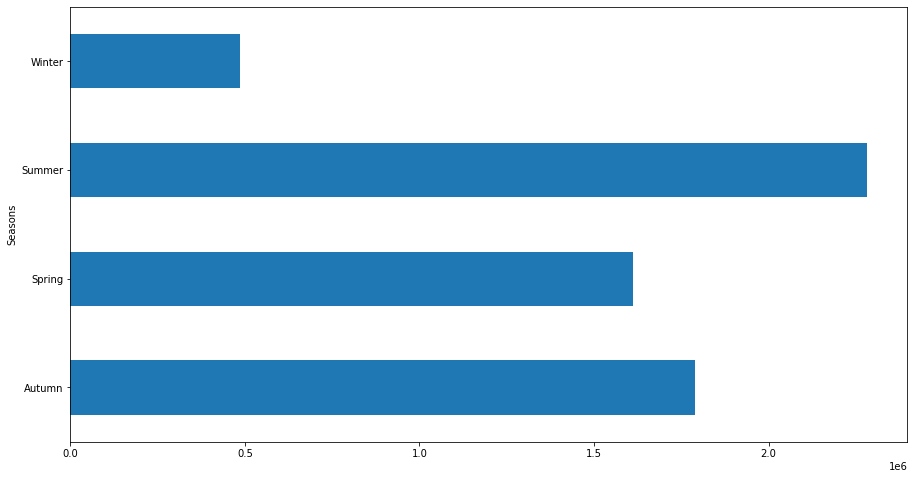

In [ ]:
# Number of Rows Reduced from 8760 to 8465 i.e. 295 rows where rented bike count was 0 were removed
# Examing the categorical columns closer

# cheking Seasons Feature

data.groupby("Seasons").sum()["Rented Bike Count"].plot(kind='barh')

# Rented Bikes are more in demand during summers and lowest during winters and demand is evenly distributed between spring and autumn

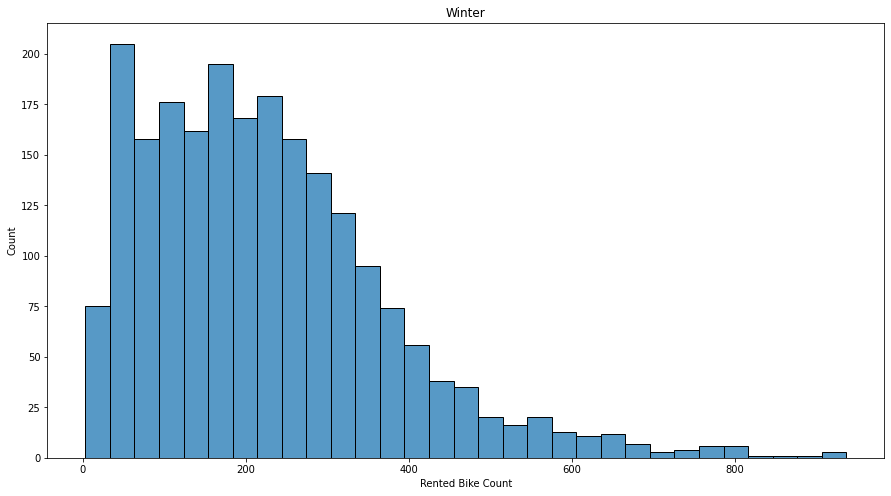

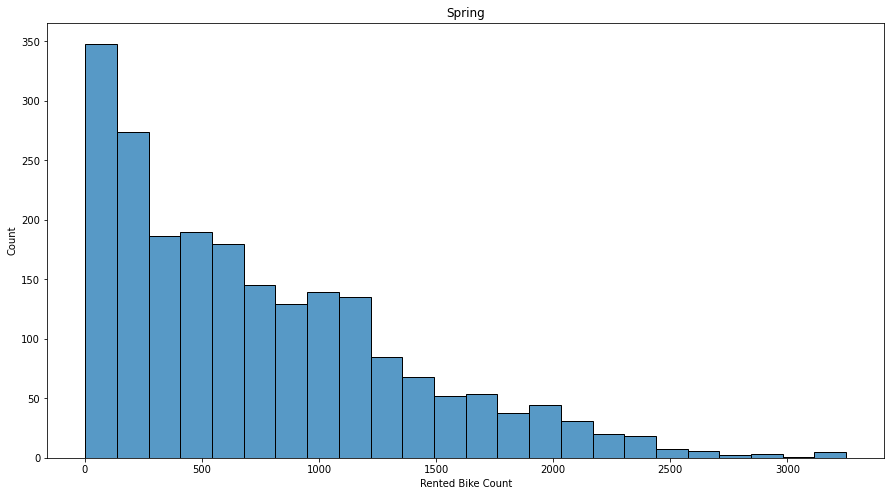

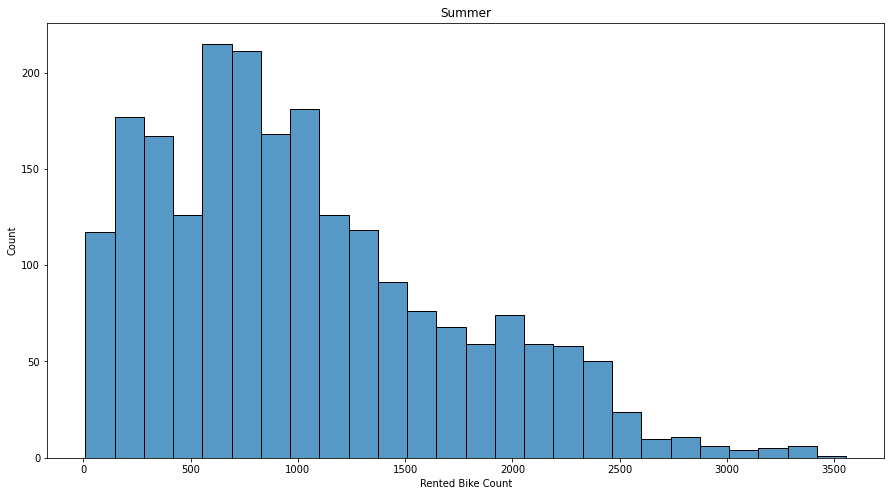

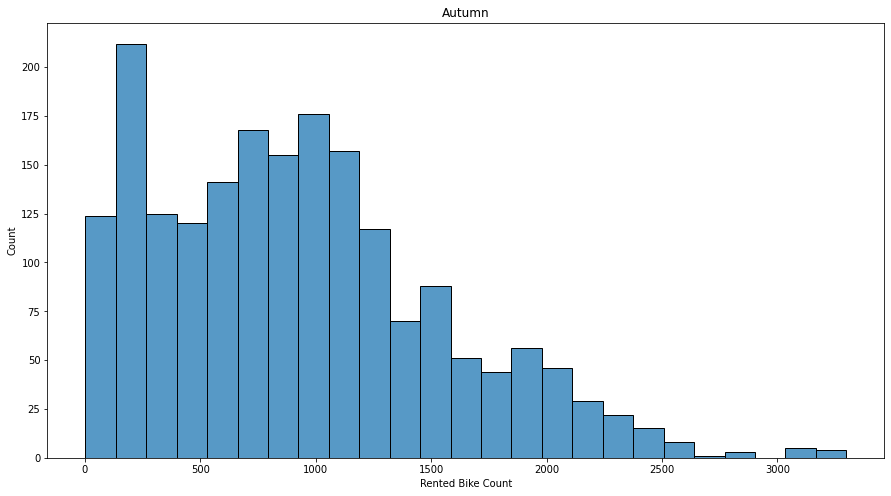

In [ ]:
for i, season in enumerate(data["Seasons"].unique()):
  plt.figure(i)
  plt.title(label=season)
  sns.histplot(data[data["Seasons"] == season]["Rented Bike Count"])

# The distribution across seasons is almost similar with minor variations The rental data seems to be left skewed or positively skewed

In [ ]:
# Looking at effect of Holiday on Bike Rentals 
data.groupby("Holiday").mean()["Rented Bike Count"]

# People tend to rent lesser number of bikes during holidays
# We have Already dropped the non functioning day rows so we should also drop the column as well

Holiday
Holiday       529.154412
No Holiday    739.284970
Name: Rented Bike Count, dtype: float64

In [ ]:
data.drop("Functioning Day", axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


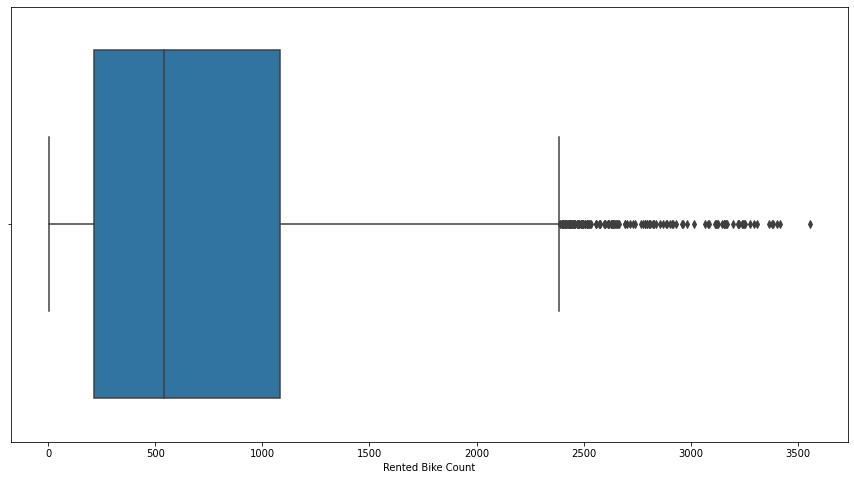

In [ ]:
# Our Dependent Variable is Rented Bike Count so we should Check for Outliers
# Checking for Outliers in Rented Bike Count

sns.boxplot(data["Rented Bike Count"])

# There are lots of dots outside the upper whisker so we should check for the upper bound outliers

In [ ]:
# Defining upper Bound
IQR = np.quantile(data["Rented Bike Count"], 0.75) - np.quantile(data["Rented Bike Count"], 0.25)
upper_bound = np.quantile(data["Rented Bike Count"], 0.75) + (1.5 * IQR)
print(upper_bound)

2389.0


In [ ]:
# Looking at rows above upper bound
data[data["Rented Bike Count"] > 2389].shape

# There are 152 rows where the rented bike  count exceeds upper bound 152 rows is approximately 1.80% hence we drop the outliers

(152, 13)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


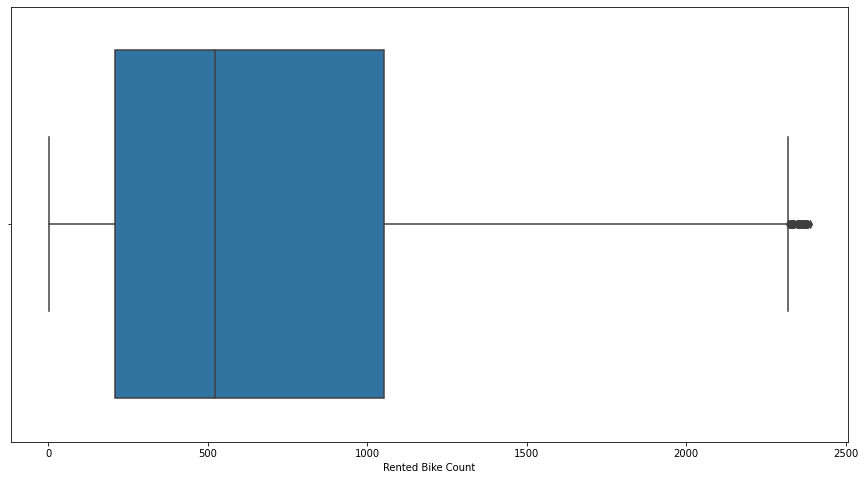

In [ ]:
# dropping rows where Rented Bike Count is more than the upper bound
data = data[data["Rented Bike Count"] < upper_bound]

# Plotting to see if there are still any outliers
sns.boxplot(data["Rented Bike Count"])

In [ ]:
# There are few points but they are very close to the upper Bound and hence we keep those
# Assumption of Linear Regression is Normally distributed data, Correlation Between dependent and Independent Variables and No multicolinearity
# We should check for Correlation of the dataset
# We should then check for correlation between Independent Variables to reduce the number of features.
# We should also check for the Distribution of the columsn to see if they follow a gausian distribution
# If they are not normally distributed then we may need to do some sort of transformation on them

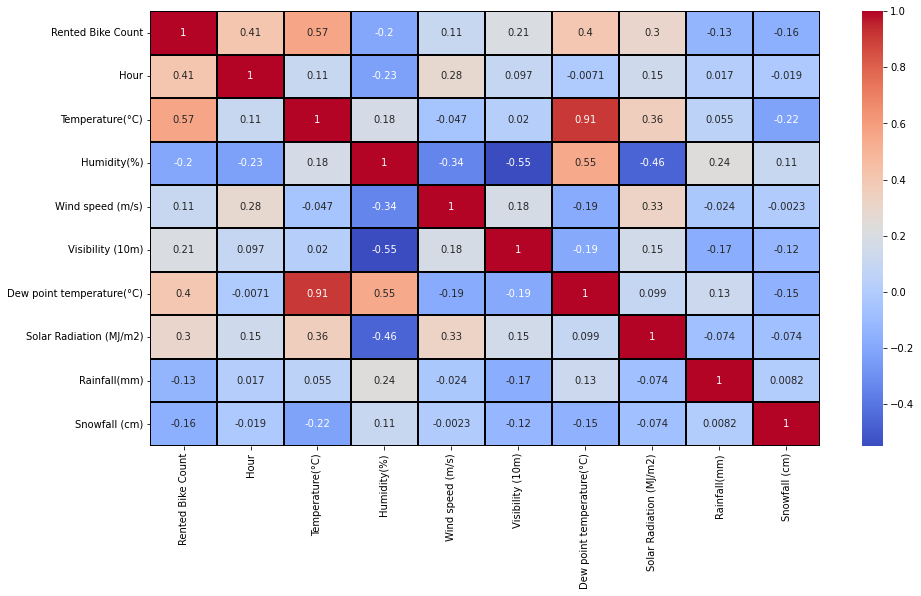

In [ ]:
# Checking for correlation in the df
corr = data.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True, linewidths=1, linecolor="black")

# The Categorical features are not included in the matrix we should encode the categorical features to check for correlation better
# Also dates are not represented in the dataset we should include dates somehow.

In [ ]:
# Converting dates to useful features.
# 1. Taking the month of the year as an integer from the date column
data["Month"] = data["Date"].apply(lambda x : x.month)
data.head()

# we can see the new feature added as the last column

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Month
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,1
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,1
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,1
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,1
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,1


In [ ]:
# Taking day of the week as an ordinal feature to see how the day of the week influences bike rentals

data["Day of Week"] = data["Date"].apply(lambda x : x.weekday())
data

# we can see the new feature added as the last column
# Year doesnt seem relevant as there are only 2 years in the whole dataset

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Month,Day of Week
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,1,3
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,1,3
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,1,3
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,1,3
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,11,4
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,11,4
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,11,4
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,11,4


In [ ]:
# Encoding Holiday and Seasons to discrete integers
enc = OrdinalEncoder()
enc.fit(data[["Holiday","Seasons"]])
data[["Holiday", "Seasons"]] = enc.transform(data[["Holiday","Seasons"]])

In [ ]:
# Checking the new Columns
data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Month,Day of Week
count,8313.000000,8313.000000,8313.000000,8313.000000,8313.000000,8313.000000,8313.000000,8313.000000,8313.000000,8313.000000,8313.000000,8313.000000,8313.000000,8313.000000
mean,692.911584,11.385300,12.560123,58.294599,1.717094,1428.825935,3.785529,0.567528,0.151834,0.079105,1.546253,0.951041,6.489835,3.025983
std,587.635968,6.919853,12.097162,20.577986,1.036166,610.873499,13.285003,0.873978,1.135603,0.447980,1.106920,0.215796,3.477852,1.989699
min,2.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,211.000000,5.000000,2.900000,42.000000,0.900000,925.000000,-5.400000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000,1.000000
50%,522.000000,11.000000,13.000000,57.000000,1.500000,1680.000000,4.500000,0.010000,0.000000,0.000000,2.000000,1.000000,7.000000,3.000000
75%,1054.000000,17.000000,22.400000,74.000000,2.300000,2000.000000,15.000000,0.930000,0.000000,0.000000,3.000000,1.000000,10.000000,5.000000
max,2387.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,3.000000,1.000000,12.000000,6.000000


In [ ]:
# now that we have encoded the categorical features and extracted relavant information from dates we should drop the date columns
data.drop("Date", axis=1, inplace=True)
data

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Month,Day of Week
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3.0,1.0,1,3
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3.0,1.0,1,3
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3.0,1.0,1,3
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3.0,1.0,1,3
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3.0,1.0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0.0,1.0,11,4
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0.0,1.0,11,4
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0.0,1.0,11,4
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0.0,1.0,11,4


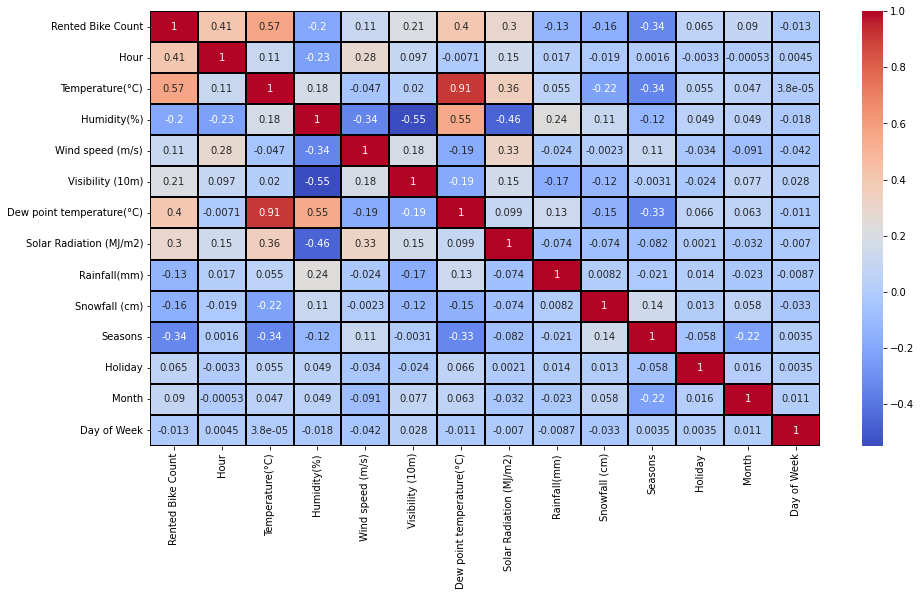

In [ ]:
# Now Checking for correlation between the columns
corr = data.corr()
sns.heatmap(corr, cmap='coolwarm', linewidths=1, linecolor='black', annot=True)

In [ ]:
# Temprature and Dew Point Temprature are almost perfectly correlated hence we drop dew point temprature
data.drop("Dew point temperature(°C)", axis=1, inplace=True)

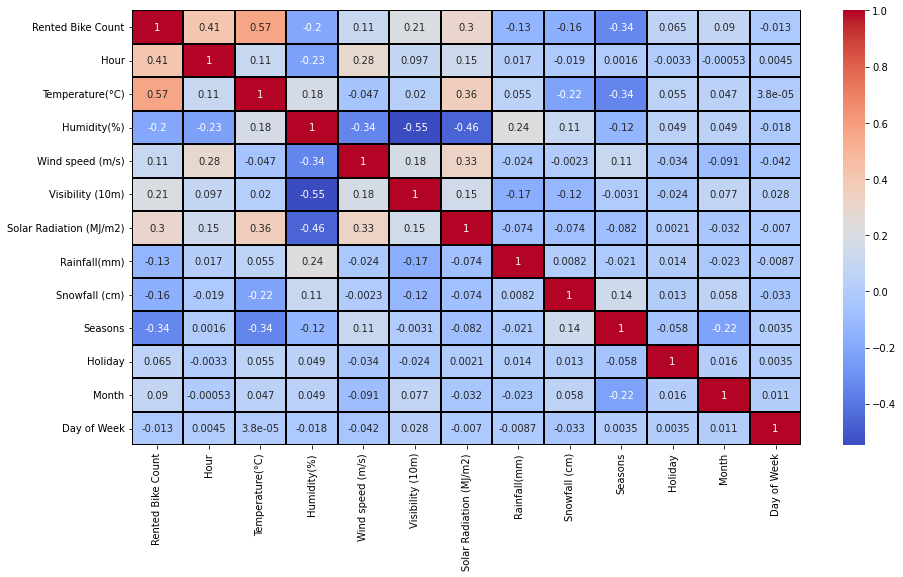

In [ ]:
# Checking for correlation again
sns.heatmap(data.corr(), cmap='coolwarm', linewidths=1, linecolor="black", annot=True)

In [ ]:
# Fitting and Testing a Baseline Model without any preprocessing of the data

In [ ]:
# Building the first simple model
lr_model = LinearRegression()
X = data[[col for col in data.columns if col!= "Rented Bike Count"]]
y = data[["Rented Bike Count"]]


In [ ]:
# Splitting the Data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=111)

In [ ]:
# Fitting the Data
lr_model.fit(x_train,y_train)

LinearRegression()

In [ ]:
# String predictions in an array
predictions_lr_model = lr_model.predict(x_train)

In [ ]:
# Checking the R squared score of the Model
lr_model.score(x_test, y_test)

0.5385402853258826

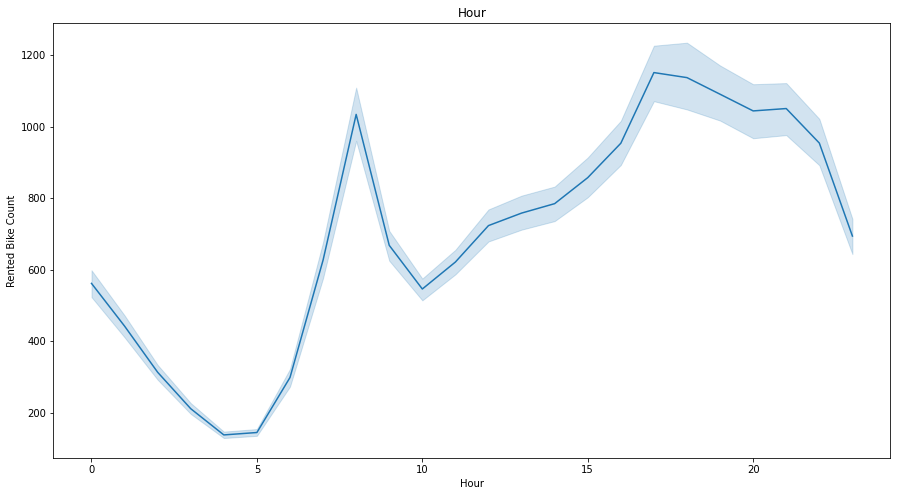

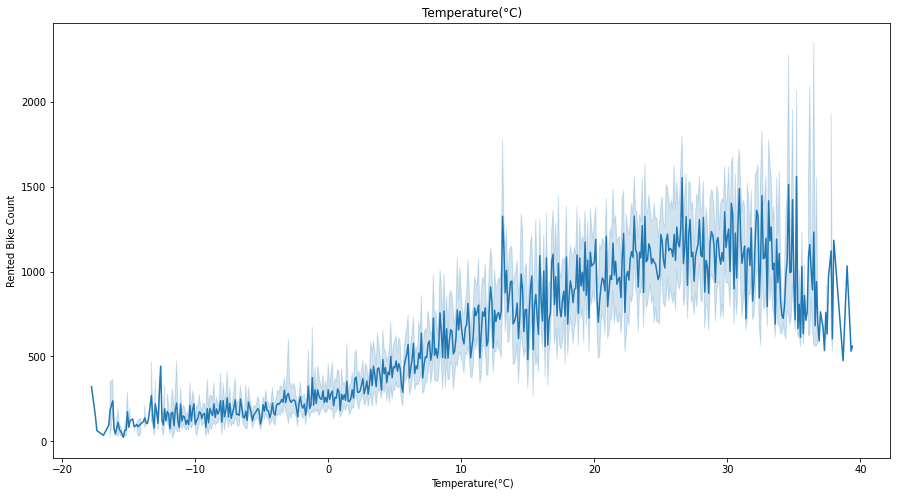

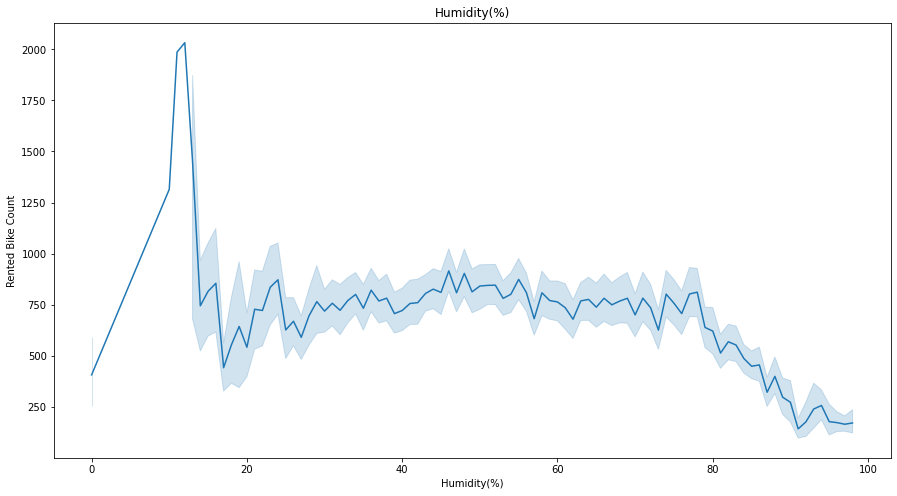

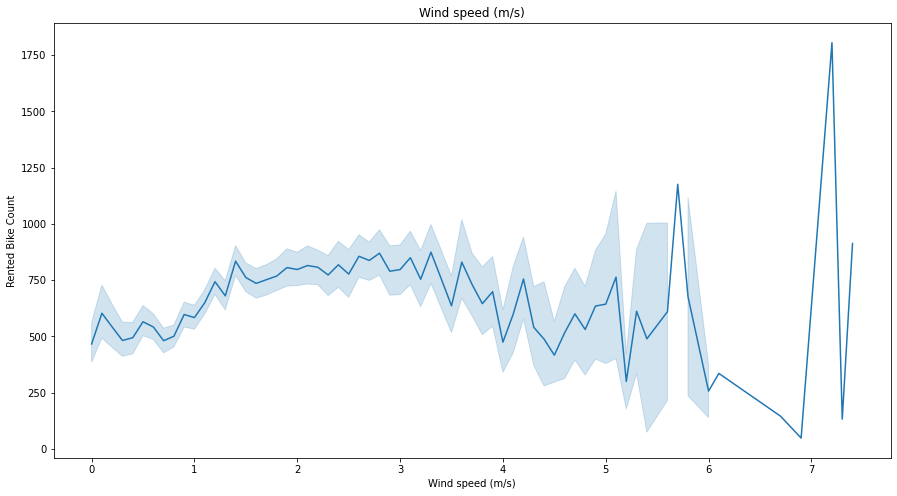

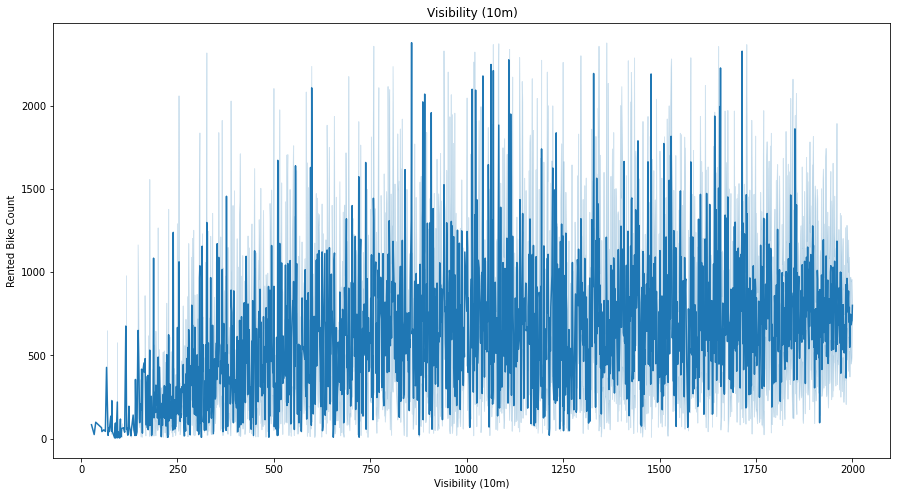

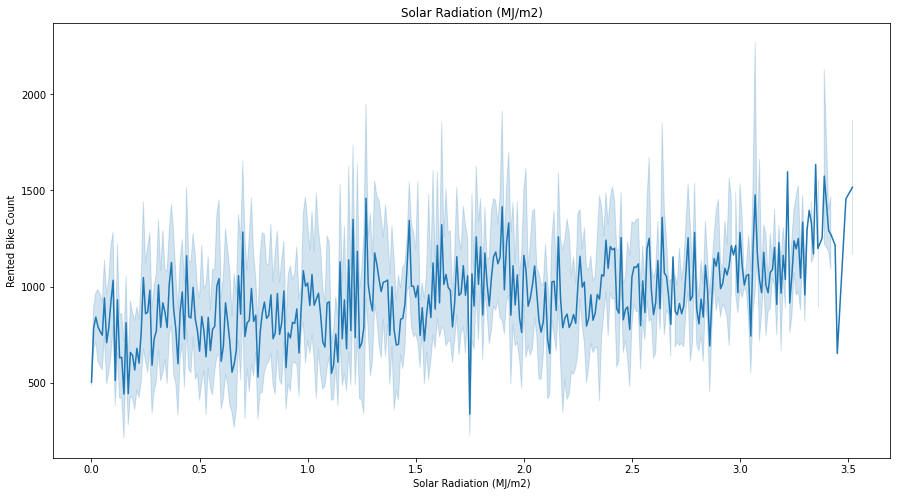

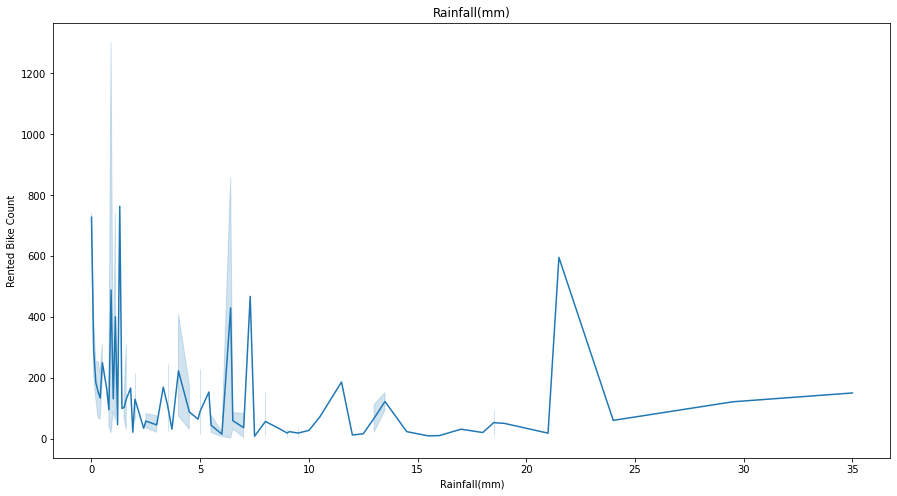

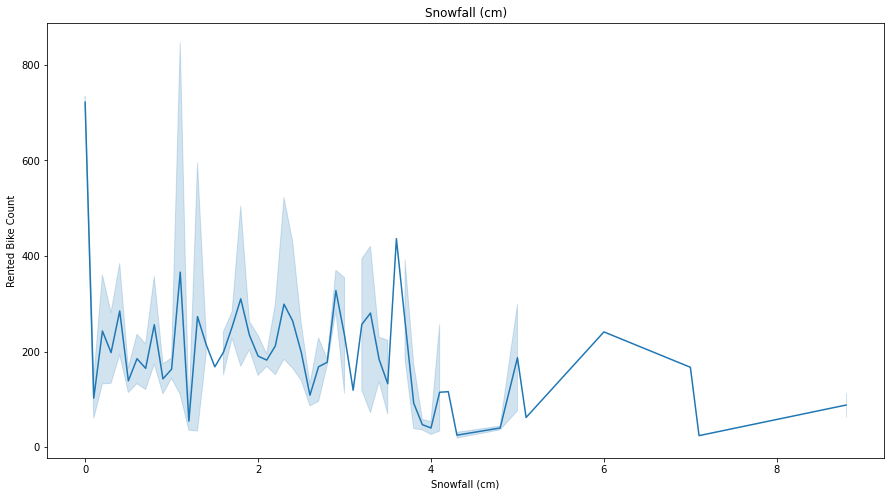

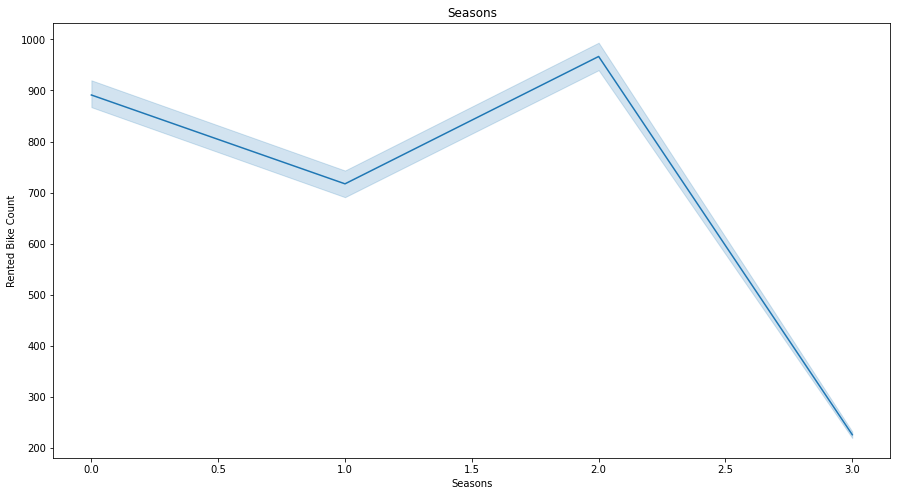

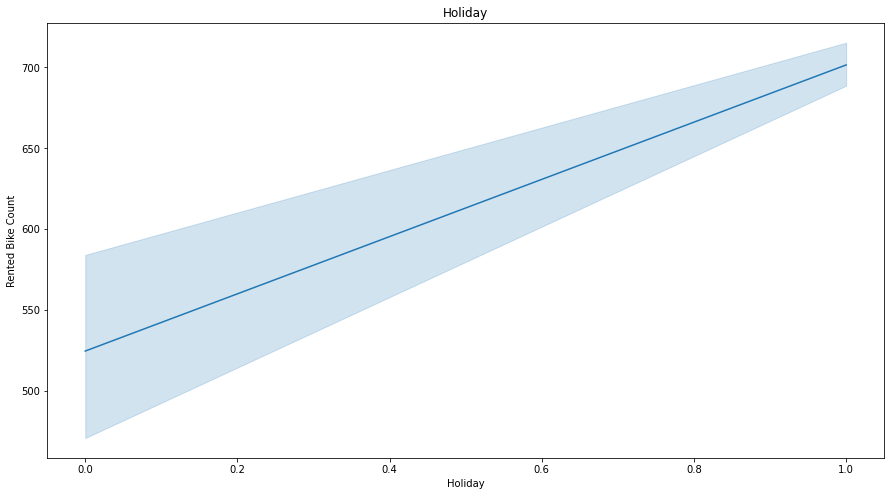

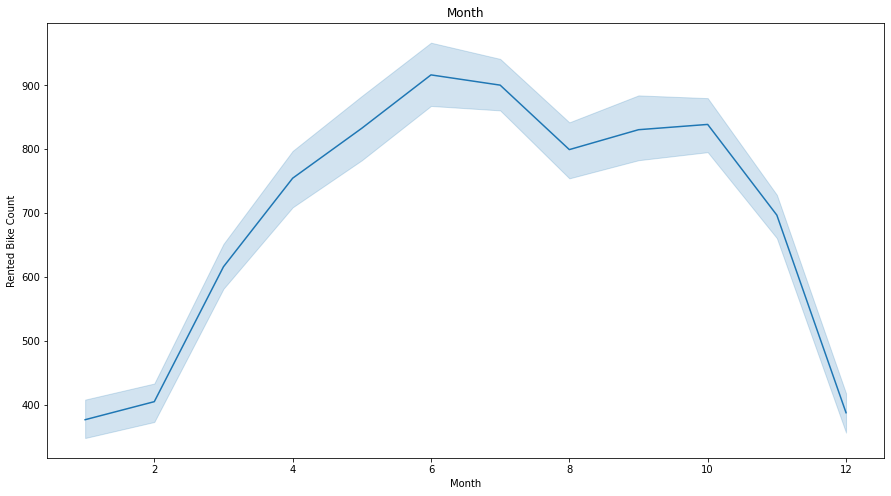

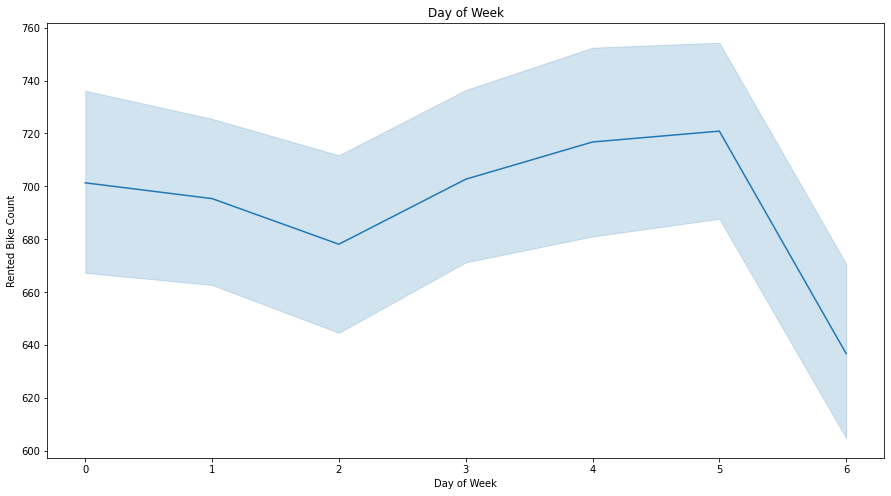

In [ ]:
# lets check out the features and their relationship with the dependent variable
for i, features in enumerate([col for col in data.columns if col != "Rented Bike Count"]):
  plt.figure(i)
  plt.title(label=features)
  sns.lineplot(x=data[features], y=data["Rented Bike Count"])


In [ ]:
# We will treat Rainfall and Snowfall as categorical features with value 1 if it rained and snowed and 0 if it did not beacuse there is no apparent linear realtionship between rainfall, snowfall and Rented Bike Count.
data["rainfall_cat"] = data['Rainfall(mm)'].apply(lambda x : 1 if x > 0 else 0)

In [ ]:
data['snowfall_cat'] = data['Snowfall (cm)'].apply(lambda x : 1 if x > 0 else 0)

In [ ]:
# We will drop the continuos values of rainfall and snowfall after encoding
data_new = data.drop(["Rainfall(mm)", "Snowfall (cm)"], axis=1)

In [ ]:
# Categorizing the data into X for independent variables and Y for independent variables.
X = data_new[[col for col in data_new.columns if col!= "Rented Bike Count"]]
y = data_new[["Rented Bike Count"]]

In [ ]:
# Splitting the data into training and testing set
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=111, test_size = 0.25)

In [ ]:
# Creating a Linear Regression Model after converting Rainfall and Snowfall into categorical features.
lr_model.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Checking the error on test set
predictions = lr_model.predict(x_test)
print(f"Mean Absolute Error : {mean_absolute_error(predictions, y_test)}")
print(f"Mean Squared Error : {mean_squared_error(predictions, y_test)}")
print(f"R squared score : {lr_model.score(x_test, y_test)}")

Mean Absolute Error : 297.39443016465964
Mean Squared Error : 155163.0486053484
R squared score : 0.5521338538333413


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Score improves marginally after converting rainfall and snowfall into categorical columns so we keep the columns as categorical

In [ ]:
# lets plot the Rented Bike Count to see the shape of its distributions.

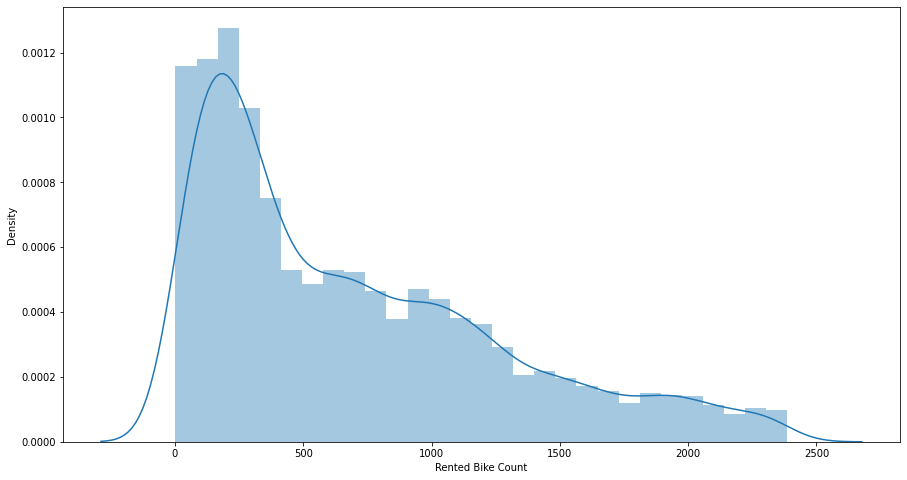

In [ ]:
sns.distplot(data_new["Rented Bike Count"])

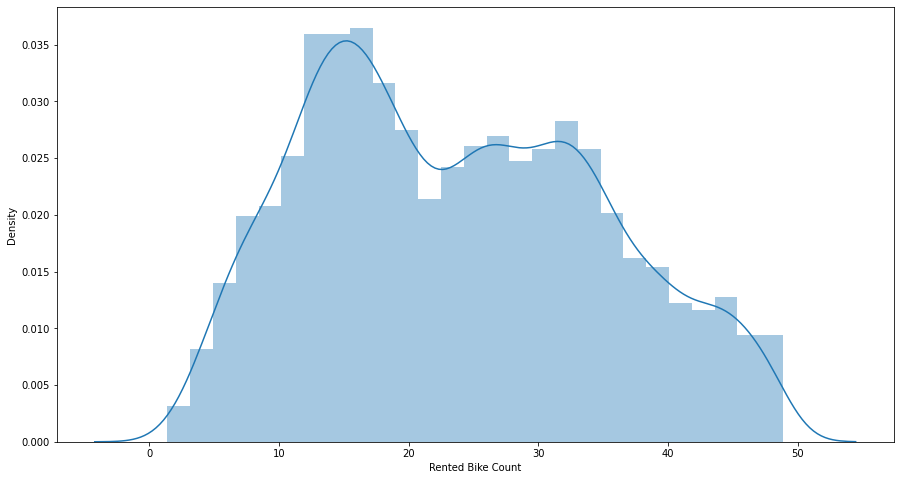

In [ ]:
# its bimodal in nature lets try squreroot transformation
sns.distplot(np.sqrt(data_new["Rented Bike Count"]))

In [ ]:
# Taking the square root makes the target variable much more normally distributed
# So we transform the target variable by taking square root of the variable and then fitting the model
data_new["Rented Bike Count"] = np.sqrt(data_new["Rented Bike Count"])

In [ ]:
# Now lets Try fitting a model and check the r squared score

# Splitting the data into training and testing set after tranformation of target variable

X, Y = data_new[[col for col in data_new.columns if col != "Rented Bike Count"]], data_new["Rented Bike Count"]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=111)

In [ ]:
# Fitting the model
lr_model.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Checking Other metrics for the model.
predictions_lr_model = lr_model.predict(x_test)
print(f"Mean Absolute Error : {mean_absolute_error(predictions_lr_model, y_test)}")
print(f"Mean Squared Error : {mean_squared_error(predictions_lr_model, y_test)}")
print(f"R squared score : {lr_model.score(x_test, y_test)}")
# The R2 score has improved significantly by tranforming the data hence we should keep tranformed target variable

Mean Absolute Error : 5.343638999074267
Mean Squared Error : 48.07170705777897
R squared score : 0.6244151570456251


In [ ]:
# R squared error of 0.6245 is not very confidence inspiring which we got with the simple linear regression hence we should fit and evaluate XGBoost and Random Forest Regression Models to check if we get a better R sqaured score.

# Building a XGB Regression Model

# Checking error and r squared score for training set

xgb_model = XGBRegressor()
xgb_model.fit(x_train, y_train)
predictions_xgb = xgb_model.predict(x_train)
print(f"Mean Absolute Error : {mean_absolute_error(predictions_xgb, y_train)}")
print(f"Mean Squared Error : {mean_squared_error(predictions_xgb, y_train)}")
print(f"R squared score : {xgb_model.score(x_train, y_train)}")

[10:48:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean Absolute Error : 2.7873506310804244
Mean Squared Error : 15.15229148508966
R squared score : 0.8824690728024163


In [ ]:
# Checking Scores for test set
predictions_xgb = xgb_model.predict(x_test)
print(f"Mean Absolute Error : {mean_absolute_error(predictions_xgb, y_test)}")
print(f"Mean Squared Error : {mean_squared_error(predictions_xgb, y_test)}")
print(f"R squared score : {xgb_model.score(x_test, y_test)}")

Mean Absolute Error : 3.0432356333949095
Mean Squared Error : 18.48969947435905
R squared score : 0.8555397488796483


In [ ]:
# lets try scaling the features to see if the model improves.

scaler = StandardScaler()
data_scaled = data_new.copy()
data_scaled[list(data.columns)] = scaler.fit_transform(data[list(data.columns)])
data_scaled.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Seasons,Holiday,Month,Day of Week,rainfall_cat,snowfall_cat,Rainfall(mm),Snowfall (cm)
0,-0.746956,-1.645408,-1.468211,-1.034886,0.466079,0.935068,-0.649401,1.313405,0.226892,-1.578608,-0.01306,-0.256987,-0.237255,-0.133712,-0.176592
1,-0.832047,-1.500888,-1.493012,-0.986288,-0.885137,0.935068,-0.649401,1.313405,0.226892,-1.578608,-0.01306,-0.256987,-0.237255,-0.133712,-0.176592
2,-0.884804,-1.356368,-1.534347,-0.937689,-0.692106,0.935068,-0.649401,1.313405,0.226892,-1.578608,-0.01306,-0.256987,-0.237255,-0.133712,-0.176592
3,-0.997126,-1.211847,-1.550880,-0.889091,-0.788621,0.935068,-0.649401,1.313405,0.226892,-1.578608,-0.01306,-0.256987,-0.237255,-0.133712,-0.176592
4,-1.046479,-1.067327,-1.534347,-1.083485,0.562594,0.935068,-0.649401,1.313405,0.226892,-1.578608,-0.01306,-0.256987,-0.237255,-0.133712,-0.176592


In [ ]:
# Creating Training and Testing sets with the scaled data
X, Y = data_scaled[[col for col in data_new.columns if col != "Rented Bike Count"]], data_new["Rented Bike Count"]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=111)

In [ ]:
# Creating and evaluating a Linear Regression Model and evaluating it on training set
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
predictions_lr = lr_model.predict(x_train)
print(f"Mean Absolute Error : {mean_absolute_error(predictions_lr, y_train)}")
print(f"Mean Squared Error : {mean_squared_error(predictions_lr, y_train)}")
print(f"R squared score : {lr_model.score(x_train, y_train)}")

Mean Absolute Error : 5.122908567152916
Mean Squared Error : 44.287587534747985
R squared score : 0.6564769605029621


In [ ]:
# Evaluating the Linear Regression Model on the Test Set
predictions_lr = lr_model.predict(x_test)
print(f"Mean Absolute Error : {mean_absolute_error(predictions_lr, y_test)}")
print(f"Mean Squared Error : {mean_squared_error(predictions_lr, y_test)}")
print(f"R squared score : {lr_model.score(x_test, y_test)}")

Mean Absolute Error : 5.343638999074271
Mean Squared Error : 48.07170705777902
R squared score : 0.6244151570456249


In [ ]:
# Creating a XGBoost Regressor and evaluating the model on training set
xgb_model = XGBRegressor()
xgb_model.fit(x_train, y_train)
predictions_xgb = xgb_model.predict(x_train)
print(f"Mean Absolute Error : {mean_absolute_error(predictions_xgb, y_train)}")
print(f"Mean Squared Error : {mean_squared_error(predictions_xgb, y_train)}")
print(f"R squared score : {xgb_model.score(x_train, y_train)}")

[10:48:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean Absolute Error : 2.7873506310804244
Mean Squared Error : 15.15229148508966
R squared score : 0.8824690728024163


In [ ]:
# Evaluating XGBoost Model on the test set
predictions_xgb = xgb_model.predict(x_test)
print(f"Mean Absolute Error : {mean_absolute_error(predictions_xgb, y_test)}")
print(f"Mean Squared Error : {mean_squared_error(predictions_xgb, y_test)}")
print(f"R squared score : {xgb_model.score(x_test, y_test)}")

Mean Absolute Error : 3.042752059048306
Mean Squared Error : 18.48573332916468
R squared score : 0.8555707364212011


In [ ]:
# Creating a Random Forest Regression Model and evaluating the model on the Train set
rf_regressor = RandomForestRegressor()
rf_regressor.fit(x_train, y_train)
predictions_rf = rf_regressor.predict(x_train)
print(f"Mean Absolute Error : {mean_absolute_error(predictions_rf, y_train)}")
print(f"Mean Squared Error : {mean_squared_error(predictions_rf, y_train)}")
print(f"R squared score : {rf_regressor.score(x_test, y_test)}")

Mean Absolute Error : 0.8844252389378401
Mean Squared Error : 1.7925221407362222
R squared score : 0.8950151966276382


In [ ]:
# Evaluating the Random Forest Regression model on the Test set
predictions_rf = rf_regressor.predict(x_test)
print(f"Mean Absolute Error : {mean_absolute_error(predictions_rf, y_test)}")
print(f"Mean Squared Error : {mean_squared_error(predictions_rf, y_test)}")
print(f"R squared score : {rf_regressor.score(x_test, y_test)}")

Mean Absolute Error : 2.4427410601651713
Mean Squared Error : 13.43717353857056
R squared score : 0.8950151966276382


In [ ]:
# Scaling did not have any effect on the metris.
X, Y = data_new[[col for col in data_new.columns if col != "Rented Bike Count"]], data_new["Rented Bike Count"]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=111)

In [ ]:
# Random Forest Regressor is giving us the best R squared scores hence this is the best model for prdicting the Rented Bike Count given the features.

In [ ]:
# Getting a baseline R Squared score and Other metrics for the Random Foreset Regressor with the Transformed Target Variable.

rf_regressor = RandomForestRegressor(random_state=111)
rf_regressor.fit(x_train, y_train)
predictions_rf = rf_regressor.predict(x_test)
print(f"Mean Absolute Error : {mean_absolute_error(predictions_rf, y_test)}")
print(f"Mean Squared Error : {mean_squared_error(predictions_rf, y_test)}")
print(f"R squared score : {rf_regressor.score(x_test, y_test)}")

Mean Absolute Error : 2.4263013903420765
Mean Squared Error : 13.316304737382739
R squared score : 0.8959595460691433


In [ ]:
# The Random Forest Regressor is giving us the best results and hence this should be our model of choice.

y = rf_regressor.predict(x_test)**2
y1 = y_test.values**2

print(f" The actual root mean squared error for the Random Forest Regressor Model is {np.sqrt(np.mean((y-y1)**2))}")


 The actual root mean squared error for the Random Forest Regressor Model is 202.70180843223773


In [ ]:
# Lets try hyperparameter tuning with GridSearchCV to see if we can improve our Model any further.


In [ ]:
params = {
    'n_estimators' : [i for i in range(120,150,10)],
    'max_depth' : [i for i in range(80,100,10)],
    'min_samples_split' : [1,2,3],
    'min_samples_leaf' : [1,2],
    'max_features' : [12,13,'auto'],
}

In [ ]:
cv = GridSearchCV(rf_regressor,param_grid=params, cv=5)

In [ ]:
cv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=111),
             param_grid={'max_depth': [80, 90],
                         'max_features': [12, 13, 'auto'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [120, 130, 140]})

In [ ]:
cv.best_estimator_

RandomForestRegressor(max_depth=80, max_features=12, n_estimators=140,
                      random_state=111)

In [ ]:
cv.best_params_

{'max_depth': 80,
 'max_features': 12,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 140}

In [ ]:
preds = cv.predict(x_test)

In [ ]:
cv.score(x_test, y_test)

0.8964052180478146

In [ ]:
mean_absolute_error(y_test, preds)

2.427510342430468

In [ ]:
mean_squared_error(y_test, preds)

13.25926246529843

In [ ]:
def adjusted_r2_score(r2, n, k):
  return 1 - (((n-1)/(n-k-1)) * (1-r2))

In [ ]:
adjusted_r2_score(cv.score(x_test, y_test),len(y_test),12)

0.8958035058583537